# Augmentation

In [1]:
import sys
sys.path.append('../')

from ssd_data import datasets
from ssd_data import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from ssd.core.inference import toVisualizeRectangleRGBimg

# Geometric distortions

## Random Expand

[[157  51 223 128]]
(157, 51) (223, 128)


<IPython.core.display.Javascript object>


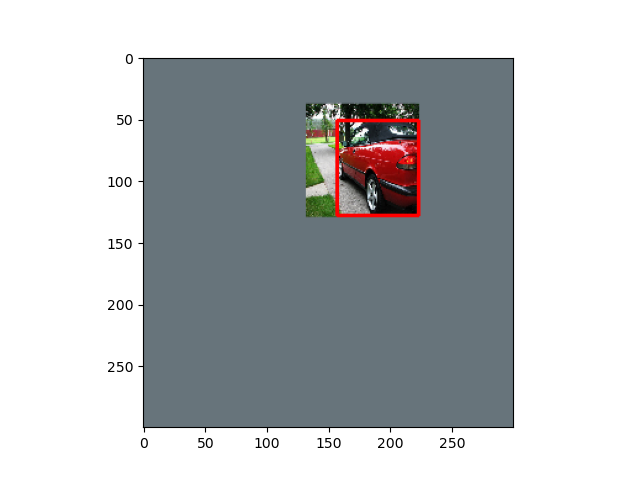

[[ 48 165 109 298]]
(48, 165) (109, 298)


<IPython.core.display.Javascript object>


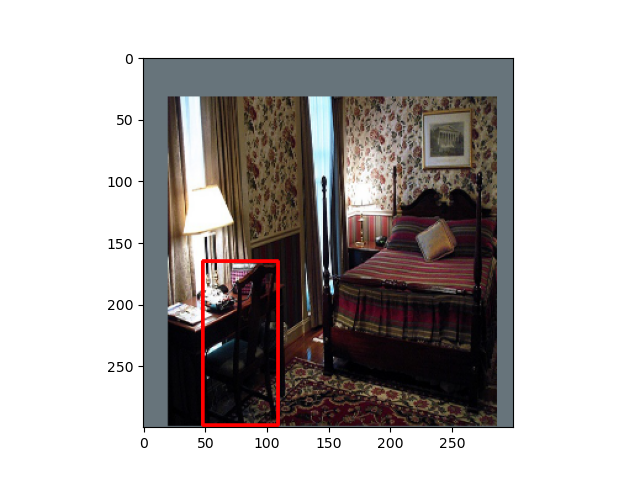

[[ 39 124 114 174]]
(39, 124) (114, 174)


<IPython.core.display.Javascript object>


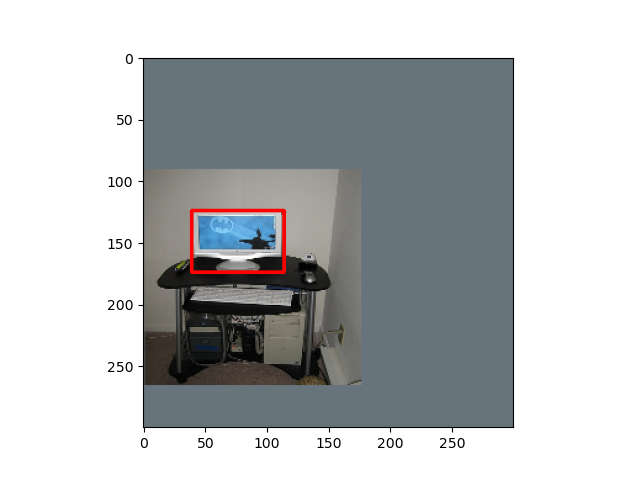

[[135  91 224 136]]
(135, 91) (224, 136)


<IPython.core.display.Javascript object>


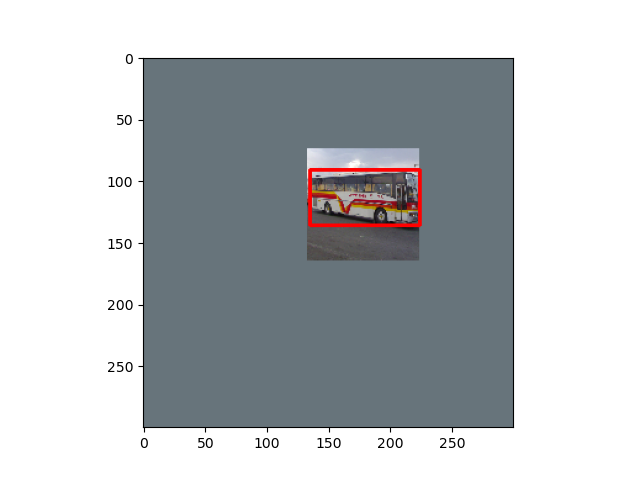

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 88  50 300 300]]
(88, 50) (300, 300)


<IPython.core.display.Javascript object>


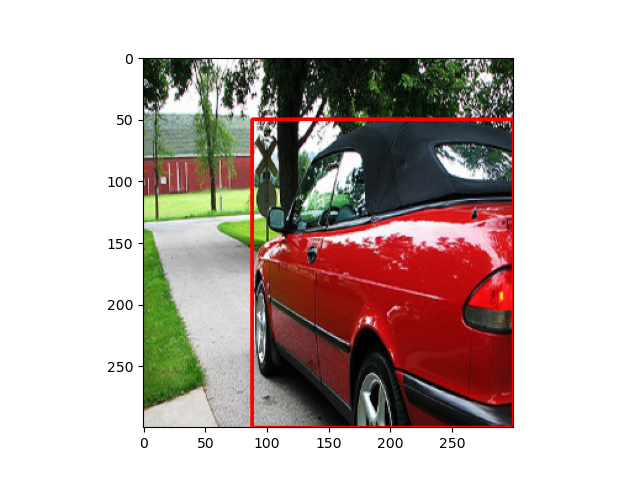

[[ 16 151  96 300]]
(16, 151) (96, 300)


<IPython.core.display.Javascript object>


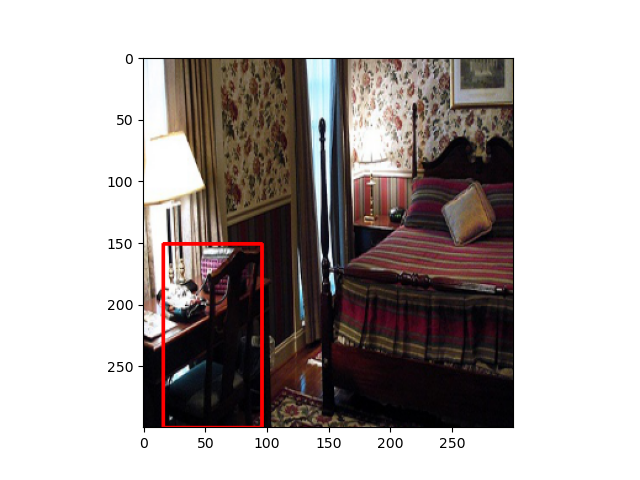

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


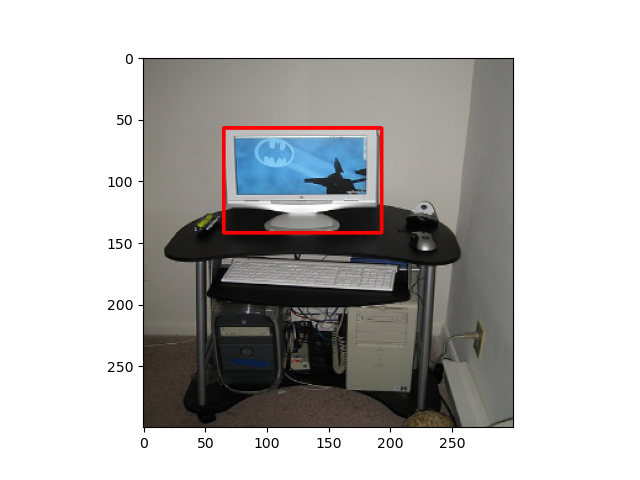

[[  0   0 300 263]]
(0, 0) (300, 263)


<IPython.core.display.Javascript object>


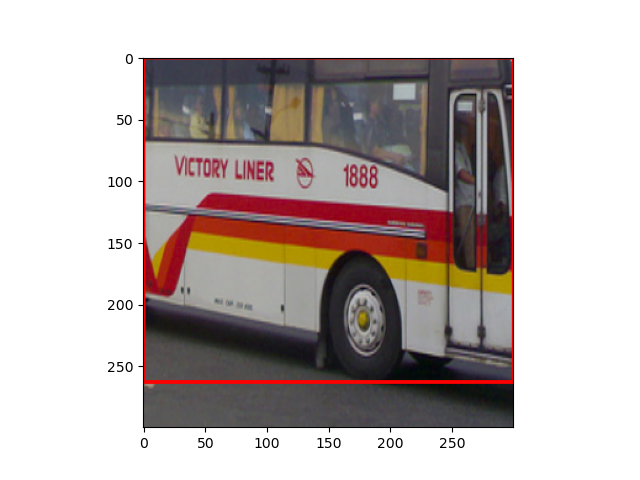

In [3]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0  45 215 297]]
(0, 45) (215, 297)


<IPython.core.display.Javascript object>


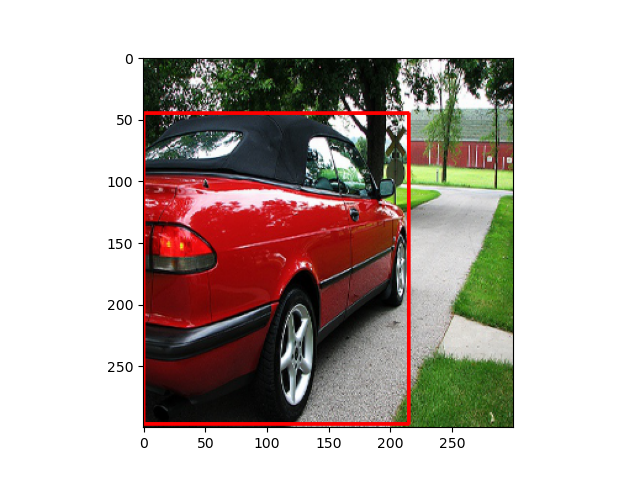

[[199 149 268 299]]
(199, 149) (268, 299)


<IPython.core.display.Javascript object>


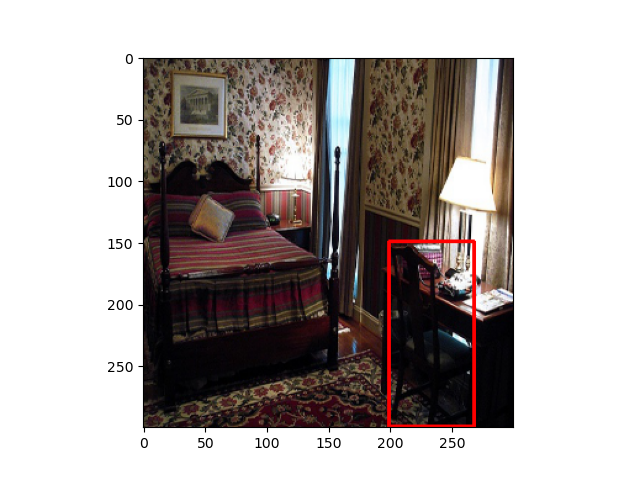

[[106  57 234 142]]
(106, 57) (234, 142)


<IPython.core.display.Javascript object>


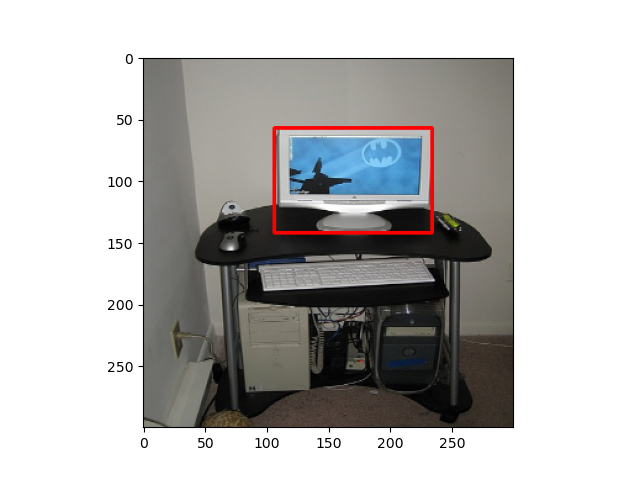

[[  0  58 291 205]]
(0, 58) (291, 205)


<IPython.core.display.Javascript object>


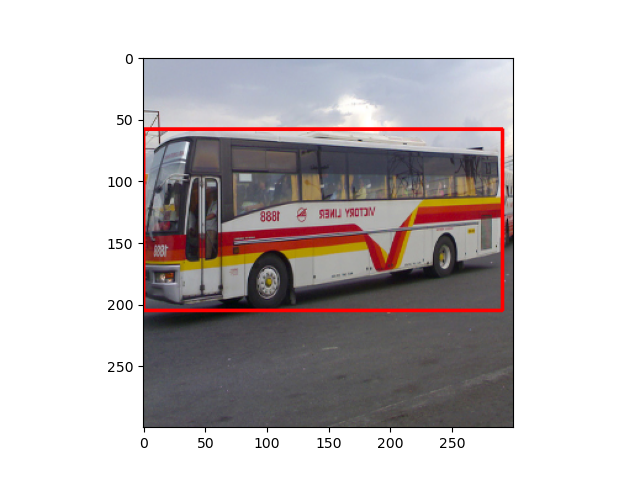

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)